In [545]:
# Importa a biblioteca pandas para manipulação de dados
import pandas as pd

# Carrega os dados do arquivo CSV para um DataFrame
df = pd.read_csv('./dados/tested.csv')

# Exibe as primeiras linhas do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Exibe informações sobre as colunas, como tipo de dado e valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [547]:
# Conta a quantidade de valores ausentes em cada coluna e organiza em ordem decrescente
df.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [548]:
# Exibe o número de valores únicos em cada coluna
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [549]:
# Remove colunas irrelevantes para análise ('PassengerId', 'Ticket', 'Cabin')
df = df.drop(['PassengerId','Ticket','Cabin'],axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [550]:
# Conta novamente os valores ausentes para confirmar a remoção
df.isna().sum().sort_values(ascending=False)

Age         86
Fare         1
Survived     0
Name         0
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [ ]:
# Localiza e exibe as linhas onde a coluna 'Age' tem valores ausentes
df.loc[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
10,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,7.8958,S
22,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,31.6833,S
29,0,3,"Samaan, Mr. Elias",male,NaN,2,0,21.6792,C
33,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,23.4500,S
36,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
408,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,7.7208,Q
410,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,7.7500,Q
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [552]:
# Cria uma nova coluna chamada 'titulo', extraindo títulos do nome das pessoas
df['titulo'] = df['Name'].str.extract(r',\s(\w+)\.')

In [ ]:
# Exibe o DataFrame atualizado
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titulo
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mr


In [554]:
# Conta os títulos presentes nas linhas com valores ausentes na coluna 'Age'
df.loc[df['Age'].isna(),'titulo'].value_counts()

titulo
Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: count, dtype: int64

In [556]:
# Calcula a mediana da idade agrupada por 'titulo' e 'Pclass' e adiciona à coluna 'median_age'
df['median_age'] = df.groupby(['titulo','Pclass'])['Age'].transform('median').round()

In [557]:
# Preencher valores ausentes de 'Age' com a mediana baseada em 'titulo' e 'Pclass'
df.loc[df['Age'].isna(),'Age'] = df['median_age']

In [558]:
# Verifica novamente as linhas onde 'Age' ainda possa estar ausente
df.loc[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titulo,median_age
88,1,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,7.75,Q,Ms,NaN


In [559]:
# Preenche manualmente valores ausentes restantes em 'Age' com 21
df.loc[df['Age'].isna(),'Age'] = 21

In [560]:
# Remove as colunas temporárias 'titulo' e 'median_age'
df = df.drop(['titulo','median_age'],axis=1)

In [561]:
# Verifica novamente a presença de valores ausentes em todas as colunas
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [563]:
# Localiza linhas onde 'Fare' tem valores ausentes
df.loc[df['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,0,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [564]:
# Preenche valores ausentes na coluna 'Fare' com 7
df.loc[df['Fare'].isna(),'Fare'] = 7

In [589]:
# Remove a coluna 'Name', já que não será utilizada
df = df.drop('Name',axis=1)

KeyError: "['Name'] not found in axis"

In [588]:
# Importa bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um boxplot para visualizar a distribuição de idade por classe (Pclass)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribuição de Idade por Classe')
plt.show()

ValueError: Could not interpret value `Pclass` for `x`. An entry with this name does not appear in `data`.

In [566]:
# Exibe informações atualizadas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [568]:
# Mapeia os valores da coluna 'Sex' para 1 (male) e 0 (female)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

<Axes: >

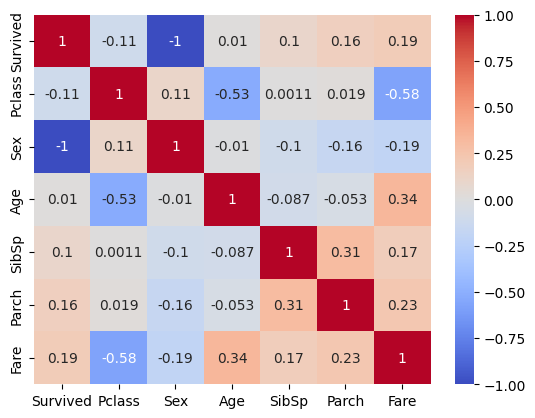

In [ ]:
# Cria um heatmap para visualizar a correlação entre colunas numéricas
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [572]:
# Define a coluna de destino (target) para a previsão
target_col = 'Survived'

# Seleciona as colunas numéricas e remove a coluna alvo
numeric_cols = df.select_dtypes('integer').columns.tolist()
numeric_cols.remove(target_col)

In [574]:
# Converte as colunas numéricas para tipos de dados inteiros menores
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, downcast='integer')

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int8   
 2   Sex       418 non-null    int8   
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int8   
 5   Parch     418 non-null    int8   
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(1), int8(4), object(1)
memory usage: 14.8+ KB


In [576]:
# Importa o OneHotEncoder para codificar a coluna categórica 'Embarked'
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Ajusta o encoder aos dados da coluna 'Embarked'
enc.fit(df[['Embarked']])

OneHotEncoder(handle_unknown='ignore')

In [577]:
# Transforma os valores de 'Embarked' em uma matriz codificada
enc_values = enc.transform(df[['Embarked']]).toarray()
enc_values

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [578]:
# Obtém os nomes das novas colunas criadas pelo encoder
enc_cols = enc.get_feature_names_out()
enc_cols

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [579]:
# Adiciona as colunas codificadas ao DataFrame original
for cols in enc_cols:
    df[enc_cols] = enc_values

In [580]:
# Remove a coluna original 'Embarked' do DataFrame
df = df.drop('Embarked',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,0,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,0,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,1,3,0,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,25.0,0,0,8.0500,0.0,0.0,1.0
414,1,1,0,39.0,0,0,108.9000,1.0,0.0,0.0
415,0,3,1,38.5,0,0,7.2500,0.0,0.0,1.0
416,0,3,1,25.0,0,0,8.0500,0.0,0.0,1.0


In [584]:
# Importa o OrdinalEncoder para codificar a coluna 'Pclass' com uma ordem definida
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Define a ordem de classificação para 'Pclass'
order_pclass = [[1, 2, 3]]

# Ajusta o encoder com a ordem definida
ode = OrdinalEncoder(categories=order_pclass)
ode.fit(df[['Pclass']])

OrdinalEncoder(categories=[[1, 2, 3]])

In [586]:
# Adiciona a nova coluna 'Pclass_ordered' ao DataFrame com os valores codificados
df['Pclass_ordered'] = ode.fit_transform(df[['Pclass']])

In [587]:
# Remove a coluna original 'Pclass' do DataFrame
df = df.drop('Pclass',axis=1)
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_ordered
0,0,1,34.5,0,0,7.8292,0.0,1.0,0.0,2.0
1,1,0,47.0,1,0,7.0000,0.0,0.0,1.0,2.0
2,0,1,62.0,0,0,9.6875,0.0,1.0,0.0,1.0
3,0,1,27.0,0,0,8.6625,0.0,0.0,1.0,2.0
4,1,0,22.0,1,1,12.2875,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
413,0,1,25.0,0,0,8.0500,0.0,0.0,1.0,2.0
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0,0.0
415,0,1,38.5,0,0,7.2500,0.0,0.0,1.0,2.0
416,0,1,25.0,0,0,8.0500,0.0,0.0,1.0,2.0
